### INTRODUCTION ###
**This is an "Analytic Report Assignment"**

In this assignment, I have a dataset of 5000 movies. I will analyze this data to show some important information.

I do my target, I'll spend 3 these steps:<br/>
&ensp;&ensp;**1.** [Data filtering and cleaning](#data_cleaning)<br/>
&ensp;&ensp;**2.** [Visualization](#visualization)<br/>
&ensp;&ensp;&ensp;&ensp;**2.1 ** [Release date erea](#release_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.2 ** [Duration area](#duration_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.3 ** [Revenue](#revenue_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.4 ** [Popularity](#popularity_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.5 ** [Vote Avarage](#vote_average_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.6 ** [Vote count](#vote_count_area)<br/>
&ensp;&ensp;&ensp;&ensp;**2.7 ** [Genres](#genres_area)<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**2.7.1 ** [Percent of genres](#percent_genres_area)<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**2.7.2 ** [Mean revenue, budget and profit by genres](#mean_revenue_genres_area)<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**2.7.3 ** [Revenue, budget per year of each genre](#revenue_genres_year)<br/>
&ensp;&ensp;**3.** [Answer some questions](#answer_question)<br/>
&ensp;&ensp;&ensp;&ensp;**3.1 ** [What areas have the most influence on revenue?](#question_3_1)<br/>
&ensp;&ensp;&ensp;&ensp;**3.2 ** [How is a movie’s revenue and average score affected by its genre?](#question_3_2)<br/>
&ensp;&ensp;&ensp;&ensp;**3.3 ** [What influence does release date have on revenue?](#question_3_3)<br/>

**Environment:**
- **Jupyter notebook version 5.4.0**
- **Python version 3.6.4**

### 0.DESCRIPTION ###

&ensp;&ensp;Before go to 3 main steps, I'll explain to you the dataset. This dataset about 4083 movies and their descriptions such as revenue, released day, vote count,... We will analize it.

&ensp;&ensp;Now, let start 3 main processes

In [1]:
# Import some libraries and do some setting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import json
import collections
%matplotlib inline
from sklearn.preprocessing import Imputer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. DATA FILTERING AND CLEANING <a name="data_cleaning"></a> ###

&ensp;&ensp;In this step, I will read dataset then check shape of dataset, columns (check if column's name is easy to understand, type of column's value), value of each columns to clean some error values. 

&ensp;&ensp;**Firstly**, import the dataset from *.csv* file and check dataframes:

In [2]:
# reads the .csv files and creates the dataframes
dfMovies = pd.read_csv('Data/tmdb_5000_movies.csv')

dfCredits = pd.read_csv('Data/tmdb_5000_credits.csv')

# get the shape of dataset
print('Movies size: {0}; Credits size:{1}'. format(dfMovies.shape, dfCredits.shape)) 

Movies size: (4803, 20); Credits size:(4803, 4)


&ensp;&ensp;The output of this step *(4803, 20)* showed us our movies data has *4803 rows* and *20 columns*, *(4803, 4)* show us credits data has *4803 rows* and *4 columns*. Look at some data of two dataset:


In [3]:
dfMovies.head(3) # Show 3 first rows of movies data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
dfCredits.head(3) # Show 3 first rows of credits data

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


&ensp;&ensp;Just look at the samples in the two dataframes, the *'id'* from credits and *'id'* from movies may be for the same sample. So, check it can be merged or not, if yes we'll merge it to one dataframe

In [5]:
(dfMovies['id']==dfCredits['movie_id']).describe()

count     4803
unique       1
top       True
freq      4803
dtype: object

&ensp;&ensp;The result tells us each *'id'* from credits is the one on movies. So, we merge it to an new dataframe. Because each id is unique for a movie, so *'title'* is the same in two datafram. To merge, we remove colum *'movie_id'* and column *'title'* from dfCredits then merge two dataframes. 

In [6]:
del dfCredits['movie_id']
del dfCredits['title']
data = pd.concat([dfMovies, dfCredits], axis=1) # Merge dataframes
data.shape # Check shape again

(4803, 22)

&ensp;&ensp;Check new merged dataframe:

In [7]:
data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


&ensp;&ensp;Our new dataframe is added 2 columns *'cast'* and *'crew'*. Take a look at column<br/>

&ensp;&ensp;**Secondly**, we rename some columns re-order columns.<br />
&ensp;&ensp;Take a fast look at column's names, We can see all the column's names are easy to understand except '*runtime*' column.<br/>
&ensp;&ensp;The '*runtime*' name means total time of a film, so I can change it to '*duration*', it's easier to understand. Let's rename the column:

In [8]:
data.rename(columns= {'runtime':'duration'},inplace= True)

&ensp;&ensp;Now column names are all easy to understand, but columns order may be hard to read dataset. So, we will re-order it as human readable. Let say, \[*'id'*, *'title'*, *release_date*, ...\]. Do re-order columns:

In [9]:
newCols = ['id', 'title', 'original_title', 'genres', 'original_language', 'spoken_languages',
           'production_companies', 'production_countries', 'duration', 'release_date', 'budget',
           'revenue', 'popularity', 'vote_average', 'vote_count', 'cast', 'crew', 'homepage',
           'keywords', 'tagline', 'overview', 'status']
data = data[newCols]

&ensp;&ensp;Now, the columns are easy to understand, to check it, use the function *data.head(3)* again.

In [10]:
data.head(3)

,id,title,original_title,genres,original_language,spoken_languages,production_companies,production_countries,duration,release_date,budget,revenue,popularity,vote_average,vote_count,cast,crew,homepage,keywords,tagline,overview,status
0,19995,Avatar,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",162.0,2009-12-10,237000000,2787965087,150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",Released
1,285,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",169.0,2007-05-19,300000000,961000000,139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",Released
2,206647,Spectre,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",148.0,2015-10-26,245000000,880674609,107.376788,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,Released




&ensp;&ensp;**Finally**, process **NaN/NULL** values

&ensp;&ensp;In this substep, I'll check *missing values* and process them. Use *.describe()* function as bellow:

In [11]:
data.describe(include='all')


,id,title,original_title,genres,original_language,spoken_languages,production_companies,production_countries,duration,release_date,budget,revenue,popularity,vote_average,vote_count,cast,crew,homepage,keywords,tagline,overview,status
count,4803.000000,4803,4803,4803,4803,4803,4803,4803,4801.000000,4802,4.803000e+03,4.803000e+03,4803.000000,4803.000000,4803.000000,4803,4803,1712,4803,3959,4800,4803
unique,NaN,4800,4801,1175,37,544,3697,469,NaN,3280,NaN,NaN,NaN,NaN,NaN,4761,4776,1691,4222,3944,4800,3
top,NaN,Batman,Batman,"[{""id"": 18, ""name"": ""Drama""}]",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",NaN,2006-01-01,NaN,NaN,NaN,NaN,NaN,[],[],http://www.missionimpossible.com/,[],Based on a true story.,A civilian oil rig crew is recruited to conduc...,Released
freq,NaN,2,2,370,4505,3171,351,2977,NaN,10,NaN,NaN,NaN,NaN,NaN,43,28,4,412,3,1,4795
mean,57165.484281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.875859,NaN,2.904504e+07,8.226064e+07,21.492301,6.092172,690.217989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,88694.614033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.611935,NaN,4.072239e+07,1.628571e+08,31.816650,1.194612,1234.585891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,7.900000e+05,0.000000e+00,4.668070,5.600000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14629.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,1.500000e+07,1.917000e+07,12.921594,6.200000,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58610.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.000000,NaN,4.000000e+07,9.291719e+07,28.313505,6.800000,737.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


&ensp;&ensp;Take a look at the result, we can see that there are 4 columns which has missing value:<br /> 
&ensp;&ensp;&ensp;&ensp;- *'homepage'* &ensp;&ensp;has 3091 rows missed value <br /> 
&ensp;&ensp;&ensp;&ensp;- *'overview'* &ensp;&ensp;has 3 rows missed value <br />
&ensp;&ensp;&ensp;&ensp;- *'release_date'* &ensp;&ensp;has 1 row missed value<br />
&ensp;&ensp;&ensp;&ensp;- *'tagline'* &ensp;&ensp;has 844 rows missed value<br />
&ensp;&ensp;&ensp;&ensp;- *'duration'* &ensp;&ensp;has 2 rows missed value

&ensp;&ensp;I separated value into two group. The first one is *'string'* values and the other one is *'number'* values.

&ensp;&ensp;Luckily, all miss values are *'string'* values and missing values in 3 columns *'homepage'*, *'overview'*, *'tagline'* aren't important to our model, so I won't replace it. &ensp;&ensp;I'll process missing value for the column *'tagline'* and *'duration'*.


&ensp;&ensp;For the *'duration'* column: only 2 missing value, so we can:<br/>
&ensp;&ensp;- **Replace by value 90** after run *data.duration.value_counts()* (because most value is 90)<br/>
&ensp;&ensp;- **Use statictis to fill out NULL value**<br/>
&ensp;&ensp;I'll try to use statictis method by using function [.fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer.fit_transform) from sklearn library:

In [12]:
data['duration'] = Imputer().fit_transform(data[['duration']])  

&ensp;&ensp;Check our *'duration'* values again:

In [13]:
data.describe(include='all') 

,id,title,original_title,genres,original_language,spoken_languages,production_companies,production_countries,duration,release_date,budget,revenue,popularity,vote_average,vote_count,cast,crew,homepage,keywords,tagline,overview,status
count,4803.000000,4803,4803,4803,4803,4803,4803,4803,4803.000000,4802,4.803000e+03,4.803000e+03,4803.000000,4803.000000,4803.000000,4803,4803,1712,4803,3959,4800,4803
unique,NaN,4800,4801,1175,37,544,3697,469,NaN,3280,NaN,NaN,NaN,NaN,NaN,4761,4776,1691,4222,3944,4800,3
top,NaN,Batman,Batman,"[{""id"": 18, ""name"": ""Drama""}]",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",NaN,2006-01-01,NaN,NaN,NaN,NaN,NaN,[],[],http://www.missionimpossible.com/,[],Based on a true story.,A civilian oil rig crew is recruited to conduc...,Released
freq,NaN,2,2,370,4505,3171,351,2977,NaN,10,NaN,NaN,NaN,NaN,NaN,43,28,4,412,3,1,4795
mean,57165.484281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.875859,NaN,2.904504e+07,8.226064e+07,21.492301,6.092172,690.217989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,88694.614033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.607225,NaN,4.072239e+07,1.628571e+08,31.816650,1.194612,1234.585891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,7.900000e+05,0.000000e+00,4.668070,5.600000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14629.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,1.500000e+07,1.917000e+07,12.921594,6.200000,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58610.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.500000,NaN,4.000000e+07,9.291719e+07,28.313505,6.800000,737.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


&ensp;&ensp;For the *'release_date'* column: only 1 missing value so we can replace by:<br /> 
&ensp;&ensp;&ensp;&ensp;- an most frequency value *(2006-01-01)* -use function *data.release_date.value_counts()* to get that value.<br /> 
&ensp;&ensp;&ensp;&ensp;- a random value.

&ensp;&ensp; Before choose the method, I'll check the row missed *'release_date'* value. Use bellow code to find which row has **NaN** as *'release_date'*

In [14]:
i = 0
for value in data['release_date'].isna():
    if value == True:
        print(i)
    i = i + 1

4553


&ensp;&ensp;The code showed **NaN** value of *'release_date'* is in row 4553. Let's look at row 4553:

In [15]:
pd.DataFrame(data, index = [4553])

,id,title,original_title,genres,original_language,spoken_languages,production_companies,production_countries,duration,release_date,budget,revenue,popularity,vote_average,vote_count,cast,crew,homepage,keywords,tagline,overview,status
4553,380097,America Is Still the Place,America Is Still the Place,[],en,[],[],[],0.0,NaN,0,0,0.0,0.0,0,[],[],NaN,[],NaN,1971 post civil rights San Francisco seemed li...,Released


&ensp;&ensp;We can see, almost value in row 4553 are **NaN or 0.0** include some important field such as *'budget'*, *'popularity'*, *'revenue'*, *'duration'*,... So, I'll drop this drop from our dataset 

In [16]:
data.drop(data.index[4553], inplace= True) # Drop row 4553 from dataset

&ensp;&ensp;Now, we finished step **Data filtering and cleaning**.

### 2. VISUALIZATION <a name="visualization"></a>###

In this step, I'll show some special data and relative between areas by charts.

&ensp;&ensp;**2.1 Release date erea <a name="release_area"></a>**

&ensp;&ensp;I will show you day and month a movie was released. Let's get releasing month values first:


In [17]:

months = [] # Null list of months
years = []
for date in data.release_date: # Search all date in release_date column
    d_value = datetime.datetime.strptime(date, "%Y-%m-%d") # Get date value
    months.append(d_value.month) # Get month value
    years.append(d_value.year) # Get year value
    
print(len(months), len(years)) # Check how many month we got again

4802 4802


&ensp;&ensp;The code return to us 4802 months was collected. That's good. Now, use function [.factorplot](https://seaborn.pydata.org/generated/seaborn.factorplot.html) to visualize month values:

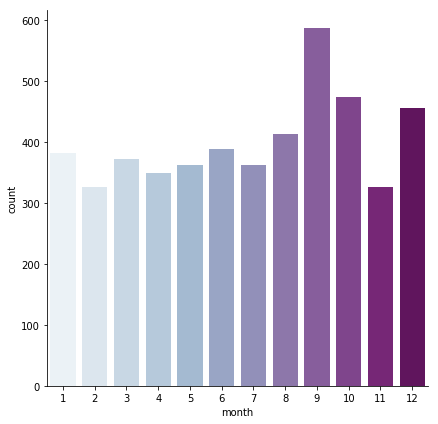

In [18]:
dfMonthRelease = pd.DataFrame({'month': months}) # Create month dataframe

# Draw a count plot to show the number of month
g = sns.factorplot(x="month", data=dfMonthRelease, kind="count",
                   palette="BuPu", size=6, aspect=1)
#g.set_xticklabels(step=2)

&ensp;&ensp;Look at the chart, we can figure that movie was released all month in a year<br/>
&ensp;&ensp;&ensp;&ensp;- *Movies were released in September are most*<br/>
&ensp;&ensp;&ensp;&ensp;- *A lot of movies were released from August to December*

&ensp;&ensp;Now, let's check day of release. Firstly, get all day:

In [19]:
weekdays =[] # Create null list of day
for date in data.release_date:
    weekdays.append(datetime.datetime.strptime(date,"%Y-%m-%d").strftime("%A"))
    
len(weekdays) # Check how many days was got again

4802

&ensp;&ensp;The result 4802 is good. Check a value of days, we'll see that:<br/>
&ensp;&ensp;&ensp;&ensp;-* All most the movies were released on Friday*

In [20]:
dfDayRelease = pd.DataFrame({'days': weekdays}) # Create month dataframe

dfDayRelease.days.value_counts()

Friday       2053
Thursday      916
Wednesday     795
Tuesday       351
Saturday      237
Monday        233
Sunday        217
Name: days, dtype: int64

&ensp;&ensp;The code about shows us: "Almost movies were released on Friday". Take a look at bellow diagram:

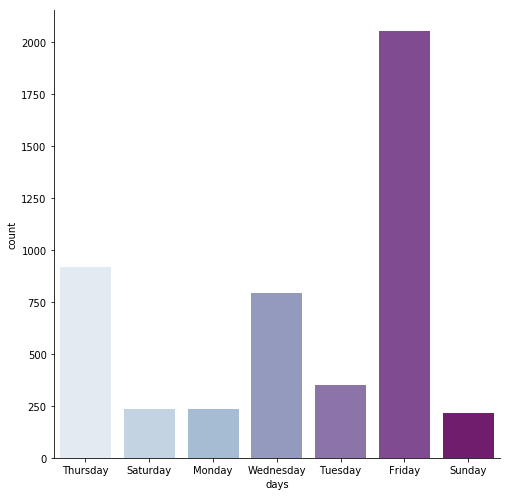

In [21]:
# Draw a count plot to show the number of month
g = sns.factorplot(x="days", data=dfDayRelease, kind="count",
                   palette="BuPu", size=7, aspect=1)

&ensp;&ensp;**2.2 Duration area <a name="duration_area"></a>**

&ensp;&ensp;Check duration of the movies. Thank to function [.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) we will see the distribution of duration's value:

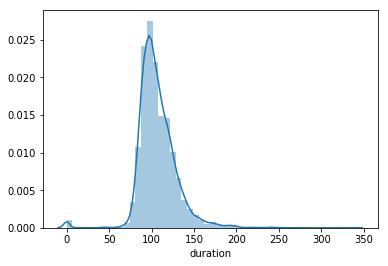

In [22]:
sns.distplot(data.duration)

&ensp;&ensp;The diagram shows us, the duration of movies about **0 to nearly 350** minutes. Notice that duration cannot be zero value, so take a look at rows which has *'zero duration'*. Use this code to find *'zero duration'* rows: 

In [23]:
list_zero_duration = [] # Create list null content index of zero duration
i = 0
for x in data.duration:
    if x == 0:
        list_zero_duration.append(i)
    i = i + 1
print('Count: %s' % len(list_zero_duration))
list_zero_duration # Print values of list

Count: 34


[1011,
 3112,
 3669,
 3809,
 3953,
 3992,
 4068,
 4118,
 4205,
 4210,
 4241,
 4313,
 4318,
 4322,
 4328,
 4405,
 4435,
 4458,
 4502,
 4504,
 4557,
 4563,
 4565,
 4568,
 4570,
 4580,
 4583,
 4610,
 4619,
 4632,
 4656,
 4657,
 4661,
 4728]

&ensp;&ensp;The code show us there are 34 rows which duration 0 are 1011,3112,... Check a look at a random row from the 34 rows, for example row 1011. We will see these values:

In [24]:
pd.DataFrame(data, index = [1011])

,id,title,original_title,genres,original_language,spoken_languages,production_companies,production_countries,duration,release_date,budget,revenue,popularity,vote_average,vote_count,cast,crew,homepage,keywords,tagline,overview,status
1011,53953,The Tooth Fairy,The Tooth Fairy,"[{""id"": 27, ""name"": ""Horror""}]",de,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",[],[],0.0,2006-08-08,0,0,0.716764,4.3,13,"[{""cast_id"": 2, ""character"": ""Peter Campbell"",...","[{""credit_id"": ""52fe4885c3a36847f816b927"", ""de...",NaN,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",NaN,A woman and her daughter (Nicole Muñoz) encoun...,Released


&ensp;&ensp;As you can see, all importan information such as *'buget'*, *'revenue'*, *production_companies*,... are **0 or null**. Check other *'zero duration'* row, we can see the similar infomation. So, zero duration rows are **removeable**, if neccesary, **we can remove it**. 

&ensp;&ensp;An important thing from *'duration'* values is:<br/>
&ensp;&ensp;&ensp;&ensp;- Values likely followed **normal distribution**

&ensp;&ensp;**2.3 Revenue <a name="revenue_area"></a>**

&ensp;&ensp;Look at the *'revenue'* distribution bellow. We can see that:<br/>
&ensp;&ensp;&ensp;&ensp;- *'revenue'* received values from 0 to nealry 2.8 billion.<br/>
&ensp;&ensp;&ensp;&ensp;- Zero has highest probability.<br/>
&ensp;&ensp;&ensp;&ensp;- Values followed **exponential distribution**<br/>

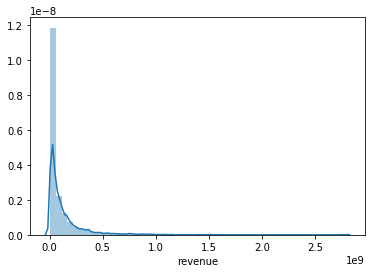

In [25]:
sns.distplot(data.revenue) # Show value's distribution

&ensp;&ensp;**2.4 Popularity <a name="popularity_area"></a>**

&ensp;&ensp;Look at the distribution bellow. We can see that:<br/>
&ensp;&ensp;&ensp;&ensp;- *'popularity'* received values from 0 to nealry 900.<br/>
&ensp;&ensp;&ensp;&ensp;- Zero has highest probability.<br/>
&ensp;&ensp;&ensp;&ensp;- Values followed **exponential distribution**

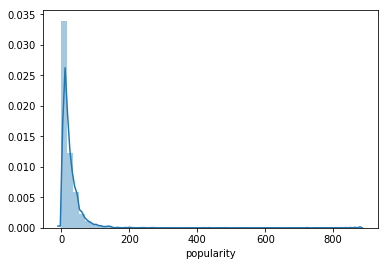

In [26]:
sns.distplot(data.popularity)

**2.5 Vote Avarage <a name="vote_average_area"></a>**

&ensp;&ensp;Look at the distribution bellow. We can see that:<br/>
&ensp;&ensp;&ensp;&ensp;- *'Vote Avarage'* received values from 0 to nealry 10.<br/>
&ensp;&ensp;&ensp;&ensp;- 6.0 has highest probability.<br/>
&ensp;&ensp;&ensp;&ensp;- Values followed **normal distribution**<br/>
&ensp;&ensp;&ensp;&ensp;- Almost users vote from 5.0 to 7.8

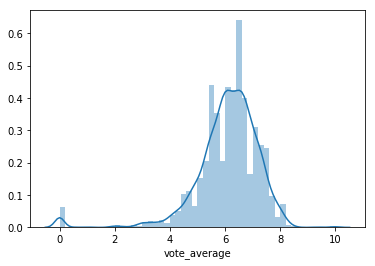

In [27]:
sns.distplot(data.vote_average) # Show distribtion

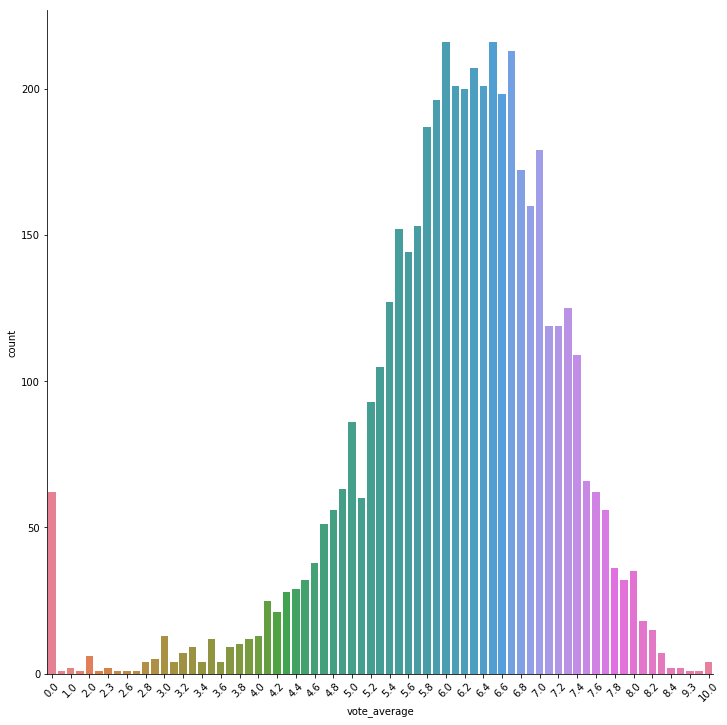

In [28]:
# Draw a count plot to show the vote_average
g = sns.factorplot(x="vote_average", data=data, kind="count",
                   palette="husl", size=10, aspect=1)
g.set_xticklabels(step=2,rotation= 45)

**2.6 Vote count <a name="vote_count_area"></a>**

&ensp;&ensp;Look at the distribution bellow. We can see that:<br/>
&ensp;&ensp;&ensp;&ensp;- *'Vote count'* received values from 0 to nealry 14000.<br/>
&ensp;&ensp;&ensp;&ensp;- Zero has highest probability.<br/>
&ensp;&ensp;&ensp;&ensp;- Values followed **exponential distribution**

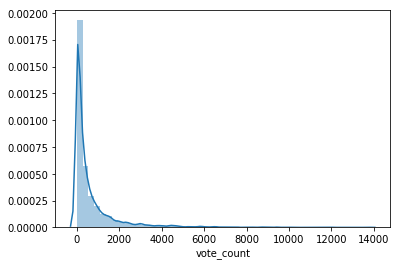

In [29]:
sns.distplot(data.vote_count)

&ensp;&ensp;**2.7 Genres <a name="genres_area"></a>**<br/>
**&ensp;&ensp;&ensp;&ensp;2.7.1 Percent of genres <a name="percent_genres_area"></a>** 

In [30]:
dfBk = data.copy()

&ensp;&ensp;&ensp;&ensp;We will check kind of movie and other important infomations. Let's  apply json for the column and get all name value from json

In [31]:
def get_genres_from_json(mString):
    '''This function get value 'name' from json 
    
    Args: mString is json input string 
    Return: name separated by ; 
    
    '''
    return ';'.join([x['name'] for x in mString])

data['genres'] = data['genres'].apply(json.loads) # Aplly json values load

data['genres'] = data['genres'].apply(get_genres_from_json) # Apply function get name from json to all value in column *'genres'*:




&ensp;&ensp;&ensp;&ensp;Now, get all kind of movie from column *'genres'* as a list and plot a [pie chart](https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html)

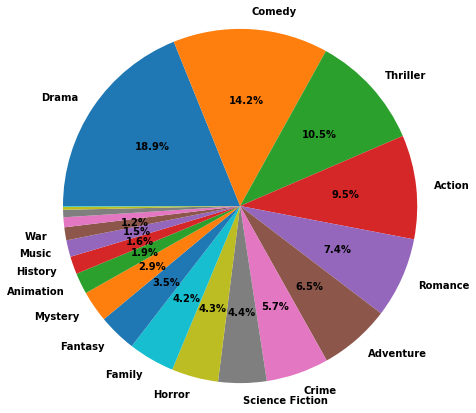

In [32]:
listGenres = [] # Create null list

for s in data['genres'].str.split(';'):
    [listGenres.append(x) for x in s if x] # Get all values in genres slpit by ; except ''

countKinds = collections.Counter(listGenres) # Count all kinds frequency
countKinds = collections.OrderedDict(countKinds.most_common()) # Sort my common

# Plot pie chart
plt.rc('font', weight='bold')
fig1, ax1 = plt.subplots(figsize=(7,7)) # Size of circle
ax1.pie(list(countKinds.values()), labels=[x if (y/len(listGenres) > 0.01) else '' for x,y in countKinds.items()],
        autopct = lambda x:'{:1.1f}%'.format(x) if x>1 else '',shadow = False, startangle=180, counterclock=False)
ax1.axis('equal') 
plt.show()

&ensp;&ensp;&ensp;&ensp;This pie chart shows to us drama movies are most common, followed by comedy, thriller, action and romance movies

&ensp;&ensp;&ensp;&ensp;**2.7.2 Mean revenue, budget and profit by genres <a name="mean_revenue_genres_area"></a>**

&ensp;&ensp;&ensp;&ensp;Let's get average values by genres. 

In [33]:
arrBudgetAvg = [] # Create null array
arrRevenueAvg = [] # Create null array
for genre in countKinds.keys():
    arrBudgetAvg.append(data[data['genres'].str.contains(genre)]['budget'].mean()) # Get average budget
    arrRevenueAvg.append(data[data['genres'].str.contains(genre)]['revenue'].mean()) # Get average revenue

&ensp;&ensp;&ensp;&ensp;Create new dataframe to store average values

In [34]:
dfAvgGenres = pd.DataFrame({'kind':list(countKinds.keys()),'buget_average':arrBudgetAvg,
                            'revenu_average': arrRevenueAvg,
                            'profit_average': list(np.array(arrRevenueAvg) - np.array(arrBudgetAvg))}) # Create new dataframe

newCols = ['kind', 'buget_average', 'revenu_average', 'profit_average'] 
dfAvgGenres = dfAvgGenres[newCols] # Reorder columns

dfAvgGenres.rename(columns= {'buget_average':'Budget', 'revenu_average':'Revenue',
                             'profit_average':'Profit'},inplace= True) # Rename column names
dfAvgGenres.head(10)

,kind,Budget,Revenue,Profit
0,Drama,2.067832e+07,5.211623e+07,3.143791e+07
1,Comedy,2.531342e+07,7.128950e+07,4.597608e+07
2,Thriller,3.196821e+07,8.104429e+07,4.907608e+07
3,Action,5.151075e+07,1.412131e+08,8.970235e+07
4,Romance,2.031136e+07,6.000239e+07,3.969103e+07
5,Adventure,6.632686e+07,2.086602e+08,1.423333e+08
6,Crime,2.784981e+07,6.615066e+07,3.830085e+07
7,Science Fiction,5.186555e+07,1.524565e+08,1.005910e+08
8,Horror,1.457403e+07,4.354508e+07,2.897105e+07
9,Family,5.071951e+07,1.623455e+08,1.116260e+08


&ensp;&ensp;&ensp;&ensp;Now, show data chart.

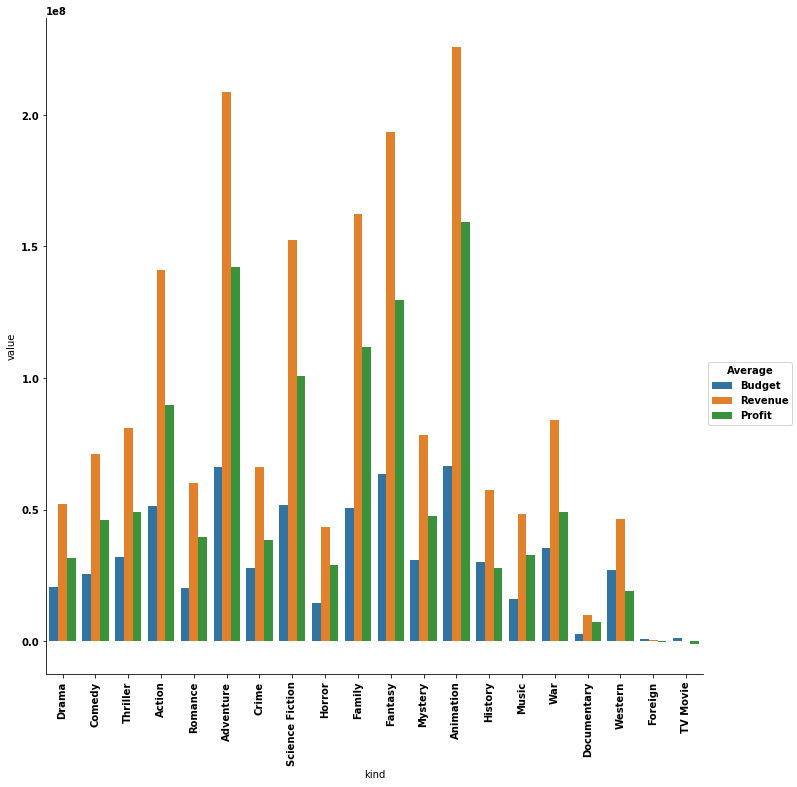

In [35]:
dfAvgGenres = pd.melt(dfAvgGenres, id_vars='kind', value_vars=['Budget','Revenue','Profit'],var_name = 'Average')

g = sns.factorplot(x='kind', y='value', hue='Average', data=dfAvgGenres, kind='bar',size=10)
g.set_xticklabels(rotation= 90)


&ensp;&ensp;&ensp;&ensp;The chart shows us mean profit of animation movies is highest. Top 3 highest budget and revenue are adventure, fantasy, animation movies. TV movies and foreign movies was least budget so it's made least revenue.

&ensp;&ensp;&ensp;&ensp;**2.7.3 Revenue, budget per year of each genre <a name="revenue_genres_year"></a>**

&ensp;&ensp;&ensp;&ensp;Let's create dataframe


In [36]:
dfNew = pd.DataFrame(data[['id', 'title', 'genres', 'budget', 'revenue', 'vote_average']]) # Create new dataframe
dfNew['year_released'] = years  # Create column year released with years was found in 2.1
print(min(years), max(years))

1916 2017


&ensp;&ensp;&ensp;&ensp;This result tells us movies in our dataset was released from 1916 to 2017. We will get mean revenue per genre per year

In [37]:
yearByYear = range(min(years), max(years)+1) # Create list years 
dfRevnueYear = pd.DataFrame(index = list(countKinds.keys())) # Create new dataframe has genres and mean revenue per year
dfBudgetYear = pd.DataFrame(index = list(countKinds.keys())) # Create new dataframe has genres and mean budget per year
dfAvgVoteYear = pd.DataFrame(index = list(countKinds.keys())) # Create new dataframe has genres and mean vote_average per year

for i in yearByYear:
    dfTmp = pd.DataFrame(dfNew[dfNew['year_released'] == i]) # List all movie in year i
    arrAvgTmp = [] # Create null revenue array
    arrAvgTmp1 = [] # Create null budget array
    arrAvgTmp2 = [] # Create null vote_average array
    
    for genre in countKinds.keys():
        arrAvgTmp.append(dfTmp[dfTmp['genres'].str.contains(genre)]['revenue'].mean()) # Get average revenue
        arrAvgTmp1.append(dfTmp[dfTmp['genres'].str.contains(genre)]['budget'].mean()) # Get average revenue
        arrAvgTmp2.append(dfTmp[dfTmp['genres'].str.contains(genre)]['vote_average'].mean()) # Get average vote_average
    
    arrAvgTmp = [0 if x != x else x for x in arrAvgTmp] # Replace NaN value by 0
    arrAvgTmp1 = [0 if x != x else x for x in arrAvgTmp1] # Replace NaN value by 0
    arrAvgTmp2 = [0 if x != x else x for x in arrAvgTmp1] # Replace NaN value by 0
    
    dfRevnueYear[i] = arrAvgTmp #Append column year with values to dataframe
    dfBudgetYear[i] = arrAvgTmp1 #Append column year with values to dataframe
    dfAvgVoteYear[i] = arrAvgTmp2 #Append column year with values to dataframe

&ensp;&ensp;&ensp;&ensp;Show some rows of revenue per genre per year

In [38]:
dfRevnueYear.head(20)

,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Drama,8394751.0,0,0,0,0,0,0,0,0,22000000.0,0,650422.0,0,2179000.0,8000000.0,0,25.0,0.0,0.0,0.0,5618000.0,0.0,4000000.0,204888229.5,5.057333e+06,6000000.0,138954825.0,0,5363000.0,9044000.0,16647062.0,2600000.0,0.0,7800000.0,0.0,19000000.0,18000000.0,25000000.0,13267960.25,0.0,1.126667e+07,17150000.0,17570324.0,12500000.0,2.246667e+07,14891364.4,35618807.75,2.568612e+07,1.551017e+07,82709196.4,20175000.0,8103775.5,1.790324e+07,2.925325e+07,2.368900e+07,3.283478e+07,4.294440e+07,1.859806e+08,17320947.0,6.449064e+07,42296899.5,4.997376e+07,1.000000e+07,3.324312e+07,1.983679e+07,2.748020e+07,2.318927e+07,2.860871e+07,3.217928e+07,3.853484e+07,3.235897e+07,6.021693e+07,6.138733e+07,7.646573e+07,1.279218e+08,5.803509e+07,9.141593e+07,7.285734e+07,1.356206e+08,7.533243e+07,5.836057e+07,7.358007e+07,4.382024e+07,4.858648e+07,4.996778e+07,3.778172e+07,4.597515e+07,4.002109e+07,5.105981e+07,5.010308e+07,4.027380e+07,4.715896e+07,5.392486e+07,3.956652e+07,4.772357e+07,4.533169e+07,9.538976e+07,5.452071e+07,5.674699e+07,7.293462e+07,6.068936e+07,0.0
Comedy,0.0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,2240500.0,4500000.0,3202000.0,8500000.0,0.0,7433101.0,9600000.0,0.000000e+00,0.0,0.0,0,6892000.0,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0,7200000.0,0.0,0.00,7000000.0,0.000000e+00,0.0,0.0,25000000.0,2.500000e+07,5000000.0,0.00,3.473333e+07,4.133756e+07,0.0,0.0,0.0,0.000000e+00,2.622626e+07,1.747792e+07,1.183370e+07,8.005430e+06,1.059870e+08,68591111.0,1.828743e+07,14407764.0,2.310482e+07,1.410000e+08,5.420637e+07,4.056580e+07,3.618987e+07,4.917055e+07,4.963809e+07,7.706024e+07,8.471052e+07,6.713943e+07,4.206042e+07,8.140686e+07,6.035897e+07,1.473084e+08,6.829757e+07,1.491277e+08,6.554884e+07,9.474867e+07,7.218928e+07,3.591524e+07,5.855068e+07,5.473045e+07,4.788135e+07,5.951596e+07,5.324065e+07,5.320310e+07,6.548645e+07,6.675075e+07,5.950422e+07,7.085953e+07,9.058726e+07,6.937232e+07,6.965731e+07,7.815022e+07,8.864117e+07,8.750149e+07,8.276906e+07,1.068331e+08,1.199000e+08,1.359984e+08,0.0
Thriller,0.0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.00,7000000.0,0.000000e+00,0.0,0.0,0.0,3.200000e+07,0.0,59600000.00,4.532162e+07,6.584053e+07,70597829.0,12500000.0,57392393.5,0.000000e+00,2.932483e+07,2.000000e+07,5.651829e+07,1.260000e+07,3.015420e+08,97572000.0,4.706540e+08,34411490.0,5.704695e+07,5.302280e+07,8.304798e+07,2.530546e+07,3.449767e+07,5.178999e+07,6.942532e+07,3.784438e+07,6.681738e+07,6.759617e+07,1.117874e+08,4.710995e+07,5.501500e+07,1.470854e+08,1.229121e+08,1.066051e+08,9.739472e+07,1.027076e+08,9.240182e+07,8.179710e+07,1.315105e+08,7.241596e+07,6.490878e+07,6.968708e+07,7.378380e+07,6.551285e+07,9.585494e+07,8.094779e+07,7.508031e+07,9.119003e+07,8.161023e+07,8.853381e+07,5.795111e+07,7.575624e+07,7.497611e+07,1.017465e+08,8.513178e+07,7.388507e+07,9.578632e+07,6.597147e+07,0.0
Action,0.0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0.0,8000000.0,0,0.0,0.0,0.0,0.0,2736000.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7800000.0,8000000.0,0.0,36000000.0,0.0,271841.00,0.0,9.000000e+06,0.0,0.0,0.0,0.000000e+00,8200000.0,54850000.00,3.972469e+07,6.584053e+07,141195658.0,12000000.0,57392393.5,0.000000e+00,2.991332e+07,9.400073e+06,4.618180e+07,9.700000e+06,8.531122e+07,97572000.0,8.000000e+06,12500000.0,1.635928e+08,6.148961e+07,6.897679e+07,1.695146e+08,9.480392e+07,5.081629e+07,1.558125e+08,8.462549e+07,5.796522e+07,1.112708e+08,8.264797e+07,

&ensp;&ensp;&ensp;&ensp;Plot [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) chart as bellow

Text(0.5,1,'')

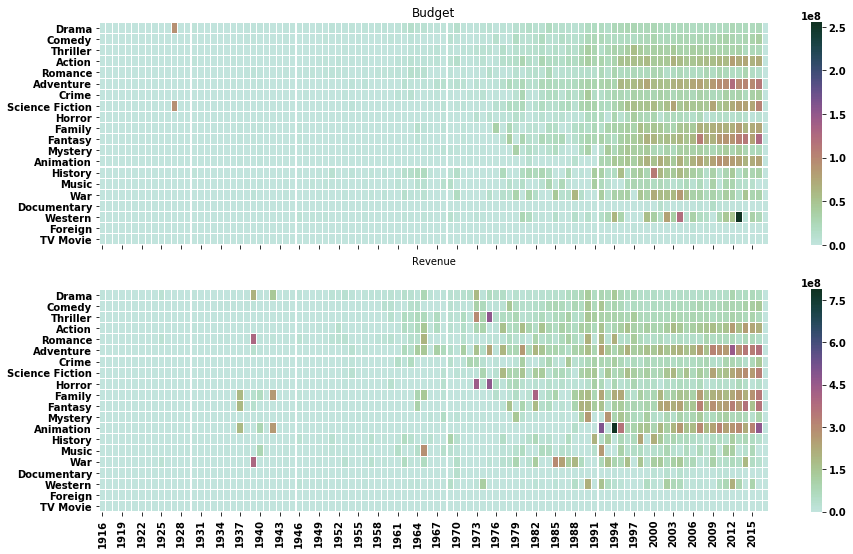

In [39]:
f, [mAx,mBx] = plt.subplots(figsize = (15, 9), nrows = 2)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(dfBudgetYear, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = mAx)
sns.heatmap(dfRevnueYear, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = mBx)
mAx.set_title('Budget')
mAx.set_xlabel('Revenue')
mAx.set_xticklabels([])
mBx.set_title('')

&ensp;&ensp;&ensp;&ensp;This chart shows us:<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;- Revenue started encrease from 1937.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;- Revenue encreased a lot from 1970 to 2010s.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;- Budget encreased a lot from 1970s to 2010s.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;- Before 1970, only somes kind of movie had budget and revenue: drama, romance, family, animation. But after 1970, there were more kind of movies was released and had big revenue, such as action, crime, adventure movies.<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;- Foreign movies and TV movies had too little budget and revenue from 1916 to 2016.<br/>

**3. Answer some questions <a name="answer_question"></a>**

&ensp;&ensp;**3.1  What areas have the most influence on revenue? <a name="question_3_1"></a>**

&ensp;&ensp;Which this question. We will analize influence of columns which has number value on revenue by **correlation value**. First thing is get list of number value columns

In [40]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list)
num_list

Index(['budget', 'duration', 'id', 'popularity', 'revenue', 'vote_average',
       'vote_count'],
      dtype='object')

&ensp;&ensp;This result shows us what column has number value.(*Note that before run above code, we must check row 1 has no NaN value (in cleaning step)*<br/>
&ensp;&ensp;Now, we create new dataframe of number values

In [41]:
num_list = [x for x in num_list if x != 'id' ] # Remove id column because no meaning
dfNumbers = data[num_list]
dfNumbers.shape

(4802, 6)

&ensp;&ensp;Above code shows us it collected 4802 rows of value to a dataframe 6 colums. Let's show some

In [42]:
dfNumbers.head(5)

,budget,duration,popularity,revenue,vote_average,vote_count
0,237000000,162.0,150.437577,2787965087,7.2,11800
1,300000000,169.0,139.082615,961000000,6.9,4500
2,245000000,148.0,107.376788,880674609,6.3,4466
3,250000000,165.0,112.312950,1084939099,7.6,9106
4,260000000,132.0,43.926995,284139100,6.1,2124


&ensp;&ensp;Plot correlation chart. See more about heatmap [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

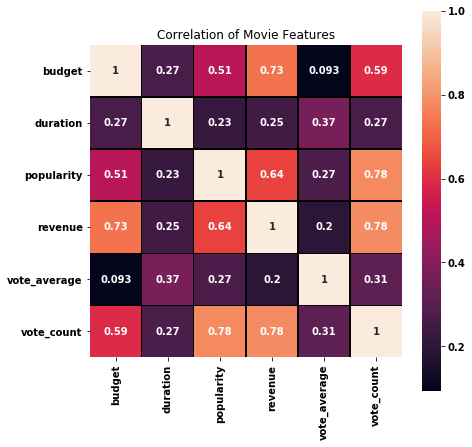

In [43]:
f, ax = plt.subplots(figsize=(7,7))
plt.title('Correlation of Movie Features')
sns.heatmap(dfNumbers.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, linecolor='black', annot=True)

&ensp;&ensp;Look at the chart at revenue line, 0.78 is largest. So, **vote_count has the most influence on revenue**.

&ensp;&ensp;**3.2  How is a movie’s revenue and average score affected by its genre? <a name="question_3_2"></a>**

&ensp;&ensp;Look again in **2.7.3** we can see that from 2000s, revenue encrease a lot. So, to check genres affected to revnues, we create new dataframe revenue per genre per year from 2010 to 2016 as bellow. We reuse *dfRevnueYear* from **2.7.3**

In [44]:
dfNew = pd.DataFrame(index= list(countKinds.keys()))
dfNew['Y2000'] = dfRevnueYear[2000]
dfNew['Y2001'] = dfRevnueYear[2001]
dfNew['Y2002'] = dfRevnueYear[2002]
dfNew['Y2003'] = dfRevnueYear[2003]
dfNew['Y2004'] = dfRevnueYear[2004]
dfNew['Y2005'] = dfRevnueYear[2005]
dfNew['Y2006'] = dfRevnueYear[2006]
dfNew['Y2007'] = dfRevnueYear[2007]
dfNew['Y2008'] = dfRevnueYear[2008]
dfNew['Y2009'] = dfRevnueYear[2009]
dfNew['Y2010'] = dfRevnueYear[2010]
dfNew['Y2011'] = dfRevnueYear[2011]
dfNew['Y2012'] = dfRevnueYear[2012]
dfNew['Y2013'] = dfRevnueYear[2013]
dfNew['Y2014'] = dfRevnueYear[2014]
dfNew['Y2015'] = dfRevnueYear[2015]
dfNew['Y2016'] = dfRevnueYear[2016]

dfNew.head(20)

,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Drama,4.996778e+07,3.778172e+07,4.597515e+07,4.002109e+07,5.105981e+07,5.010308e+07,4.027380e+07,4.715896e+07,5.392486e+07,3.956652e+07,4.772357e+07,4.533169e+07,9.538976e+07,5.452071e+07,5.674699e+07,7.293462e+07,6.068936e+07
Comedy,5.951596e+07,5.324065e+07,5.320310e+07,6.548645e+07,6.675075e+07,5.950422e+07,7.085953e+07,9.058726e+07,6.937232e+07,6.965731e+07,7.815022e+07,8.864117e+07,8.750149e+07,8.276906e+07,1.068331e+08,1.199000e+08,1.359984e+08
Thriller,6.968708e+07,7.378380e+07,6.551285e+07,9.585494e+07,8.094779e+07,7.508031e+07,9.119003e+07,8.161023e+07,8.853381e+07,5.795111e+07,7.575624e+07,7.497611e+07,1.017465e+08,8.513178e+07,7.388507e+07,9.578632e+07,6.597147e+07
Action,9.539059e+07,9.407807e+07,1.238870e+08,1.760222e+08,1.392966e+08,8.929102e+07,1.187092e+08,1.394175e+08,1.532300e+08,1.717490e+08,1.371655e+08,1.621480e+08,2.529830e+08,1.718815e+08,2.575422e+08,2.364232e+08,2.108906e+08
Romance,4.454963e+07,6.622357e+07,3.893740e+07,4.751516e+07,5.495161e+07,4.783896e+07,4.398389e+07,4.744431e+07,9.411612e+07,5.463998e+07,7.386076e+07,6.911425e+07,7.524173e+07,4.219857e+07,7.939355e+07,7.118764e+07,4.963900e+07
Adventure,1.445103e+08,1.898068e+08,1.506297e+08,1.898007e+08,2.039569e+08,1.599519e+08,1.928535e+08,2.529256e+08,1.646344e+08,3.189092e+08,2.844150e+08,2.606372e+08,4.506673e+08,2.880378e+08,3.451557e+08,3.377481e+08,3.664628e+08
Crime,6.192906e+07,6.812750e+07,7.250475e+07,5.376975e+07,6.835639e+07,6.028636e+07,5.635943e+07,7.120997e+07,8.365770e+07,4.865874e+07,4.074380e+07,9.365526e+07,9.149609e+07,6.650704e+07,4.022622e+07,7.479586e+07,1.388020e+08
Science Fiction,7.900819e+07,9.148212e+07,1.495597e+08,1.929074e+08,1.011516e+08,1.571982e+08,7.359360e+07,1.317844e+08,8.835010e+07,2.381428e+08,1.541972e+08,1.669972e+08,2.280335e+08,2.662696e+08,2.908823e+08,2.588725e+08,3.323677e+08
Horror,4.484574e+07,1.501023e+07,5.173988e+07,4.523213e+07,6.335868e+07,5.331898e+07,4.109985e+07,7.012836e+07,1.456956e+07,3.082346e+07,4.421287e+07,3.788669e+07,3.778651e+07,7.184334e+07,4.408987e+07,2.068814e+07,4.222806e+07
Family,8.410879e+07,1.952632e+08,9.154965e+07,1.137519e+08,1.621365e+08,1.456704e+08,1.087026e+08,2.530738e+08,1.450121e+08,2.066505e+08,2.235535e+08,1.792851e+08,2.302810e+08,2.705075e+08,2.114126e+08,2.817845e+08,3.477137e+08


&ensp;&ensp;Do an ANOVA test for data revenue per each year per genres. With H0: "**Revenue of each years (2000-2016) are same betweens genres, equal to genres don't effect to revenue**" 

In [45]:
stats.f_oneway(dfNew['Y2000'],dfNew['Y2001'],dfNew['Y2002'],dfNew['Y2003'],dfNew['Y2004'],
               dfNew['Y2005'],dfNew['Y2006'],dfNew['Y2007'],dfNew['Y2008'],dfNew['Y2009'],
               dfNew['Y2010'],dfNew['Y2011'],dfNew['Y2012'],dfNew['Y2013'],dfNew['Y2014'],
               dfNew['Y2015'],dfNew['Y2016'])

F_onewayResult(statistic=1.2158647360991552, pvalue=0.2536107000765169)

&ensp;&ensp;We receive pvalue = 0.2536107000765169 >> 0.05. So, we can reject H0. Therefore, genres effected to revenue. From heatmap chart in 2.7.3 we can see that some genres had a lot revenue while some others had a lot of revenue.

&ensp;&ensp;Do the same way for vote_average. We have:

In [46]:
dfNew = pd.DataFrame(index= list(countKinds.keys()))
dfNew['Y2000'] = dfAvgVoteYear[2000]
dfNew['Y2001'] = dfAvgVoteYear[2001]
dfNew['Y2002'] = dfAvgVoteYear[2002]
dfNew['Y2003'] = dfAvgVoteYear[2003]
dfNew['Y2004'] = dfAvgVoteYear[2004]
dfNew['Y2005'] = dfAvgVoteYear[2005]
dfNew['Y2006'] = dfAvgVoteYear[2006]
dfNew['Y2007'] = dfAvgVoteYear[2007]
dfNew['Y2008'] = dfAvgVoteYear[2008]
dfNew['Y2009'] = dfAvgVoteYear[2009]
dfNew['Y2010'] = dfAvgVoteYear[2010]
dfNew['Y2011'] = dfAvgVoteYear[2011]
dfNew['Y2012'] = dfAvgVoteYear[2012]
dfNew['Y2013'] = dfAvgVoteYear[2013]
dfNew['Y2014'] = dfAvgVoteYear[2014]
dfNew['Y2015'] = dfAvgVoteYear[2015]
dfNew['Y2016'] = dfAvgVoteYear[2016]

dfNew.head(20)

,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Drama,2.689383e+07,2.156267e+07,2.079779e+07,2.173717e+07,2.203117e+07,2.302987e+07,1.955511e+07,2.080322e+07,2.185727e+07,1.760139e+07,2.050320e+07,2.064913e+07,2.686389e+07,2.176040e+07,2.139409e+07,2.271263e+07,2.543919e+07
Comedy,3.078286e+07,2.272529e+07,2.378354e+07,2.556683e+07,2.762396e+07,2.700347e+07,2.562333e+07,2.783313e+07,2.808842e+07,2.536214e+07,3.265785e+07,3.292033e+07,2.931458e+07,2.476088e+07,2.936936e+07,3.171538e+07,3.951923e+07
Thriller,3.728333e+07,3.721698e+07,3.506923e+07,4.477609e+07,3.291674e+07,3.232500e+07,3.931379e+07,3.724906e+07,3.396636e+07,3.357797e+07,3.280960e+07,3.089882e+07,3.168897e+07,3.583434e+07,2.289455e+07,2.580746e+07,2.504259e+07
Action,4.367750e+07,4.504340e+07,4.556731e+07,6.537095e+07,5.716341e+07,4.793750e+07,4.846600e+07,5.379545e+07,5.717546e+07,5.524081e+07,6.367449e+07,5.885432e+07,8.099373e+07,7.233679e+07,7.582593e+07,6.637717e+07,7.152538e+07
Romance,2.874359e+07,2.812885e+07,1.552283e+07,2.090785e+07,2.444889e+07,1.945683e+07,1.914891e+07,1.827459e+07,2.702632e+07,1.874380e+07,2.892811e+07,2.374046e+07,1.844744e+07,1.796889e+07,2.831250e+07,1.733043e+07,1.377778e+07
Adventure,5.795833e+07,5.673519e+07,5.158750e+07,6.574214e+07,6.776563e+07,6.310811e+07,7.487647e+07,7.928000e+07,6.732679e+07,8.527778e+07,9.661667e+07,9.631250e+07,1.237400e+08,9.897204e+07,1.011081e+08,9.874286e+07,1.120213e+08
Crime,2.790345e+07,3.676471e+07,3.220000e+07,2.498750e+07,3.202826e+07,3.070690e+07,2.470235e+07,3.505357e+07,3.086758e+07,2.304330e+07,2.426559e+07,3.657083e+07,3.061967e+07,3.291946e+07,2.157185e+07,3.630000e+07,4.017500e+07
Science Fiction,5.836111e+07,4.426316e+07,5.380556e+07,7.703333e+07,4.744035e+07,5.660714e+07,4.734444e+07,4.789231e+07,4.603704e+07,7.679688e+07,5.022895e+07,5.538656e+07,7.196136e+07,8.151852e+07,7.793462e+07,7.628304e+07,1.045455e+08
Horror,3.061538e+07,8.227273e+06,2.231850e+07,2.146667e+07,2.172500e+07,1.909400e+07,1.472500e+07,2.473389e+07,5.883333e+06,1.178334e+07,1.639074e+07,1.572576e+07,1.151394e+07,1.675803e+07,1.102143e+07,4.919697e+06,9.720000e+06
Family,4.820000e+07,4.582353e+07,3.411111e+07,3.077778e+07,4.802174e+07,4.793548e+07,4.306286e+07,6.785000e+07,6.161821e+07,6.843750e+07,7.154310e+07,6.648036e+07,6.961863e+07,8.284062e+07,6.386957e+07,7.196176e+07,7.677778e+07


&ensp;&ensp;Do an ANOVA test with H0: "**Vote Average of each years (2000-2016) are same betweens genres, equal to genres don't effect to vote average**"

In [47]:
stats.f_oneway(dfNew['Y2000'],dfNew['Y2001'],dfNew['Y2002'],dfNew['Y2003'],dfNew['Y2004'],
               dfNew['Y2005'],dfNew['Y2006'],dfNew['Y2007'],dfNew['Y2008'],dfNew['Y2009'],
               dfNew['Y2010'],dfNew['Y2011'],dfNew['Y2012'],dfNew['Y2013'],dfNew['Y2014'],
               dfNew['Y2015'],dfNew['Y2016'])

F_onewayResult(statistic=0.5499673324023787, pvalue=0.918725042206248)

&ensp;&ensp;The result shows pvalue = 0.918725042206248 >> 0.05. So, we can reject H0. Therefore, genres effected to vote average. Look at bellow chart

Text(0.5,1,'Vote Average')

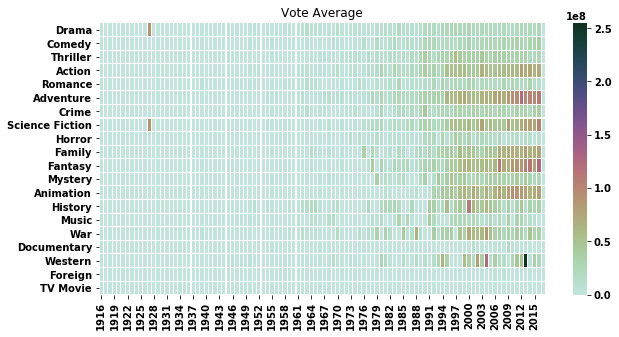

In [48]:
f, mAx = plt.subplots(figsize = (10, 5))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(dfAvgVoteYear, xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = mAx)
mAx.set_title('Vote Average')

&ensp;&ensp;We can see that some genres had high vote average while some others had low vote average.

&ensp;&ensp;**3.3  What influence does release date have on revenue? <a name="question_3_3"></a>**

&ensp;&ensp;We create dataframe revenue per month released

In [49]:
dfNew = data[['title', 'revenue']].copy()
dfNew['month_released'] = months # Get month released from 2.1
dfNew.head(3)

,title,revenue,month_released
0,Avatar,2787965087,12
1,Pirates of the Caribbean: At World's End,961000000,5
2,Spectre,880674609,10


&ensp;&ensp;We calculate mean revenue per month

In [50]:
list(range(1,13)) # Create list months

dfMonthRevenue = pd.DataFrame(index = list(range(1,13))) # Create new dataframe has index = months

listRevenue = [] # List mean revenue

for i in list(range(1,13)):
    listRevenue.append(dfNew[dfNew['month_released'] == i]['revenue'].mean()) # Collect min revenue in month i

dfMonthRevenue['mean_revenue'] = listRevenue
dfMonthRevenue.head(12)

,mean_revenue
1,2.863406e+07
2,5.613842e+07
3,7.310316e+07
4,7.392762e+07
5,1.339301e+08
6,1.522845e+08
7,1.115768e+08
8,5.580475e+07
9,3.999196e+07
10,5.289629e+07


&ensp;&ensp;Plot the revenue by month

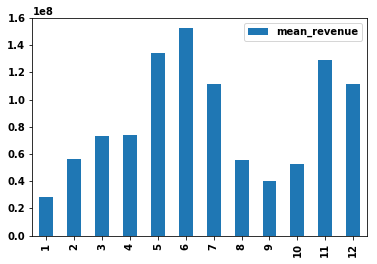

In [51]:
dfMonthRevenue.plot(kind='bar')

&ensp;&ensp;The chart shows that movie were released in May to July and in November, December have higher revenue than others.